In [58]:
import pyrosetta

In [59]:
from pyrosetta import *
init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

Successfully downloaded 5TJ3.pdb


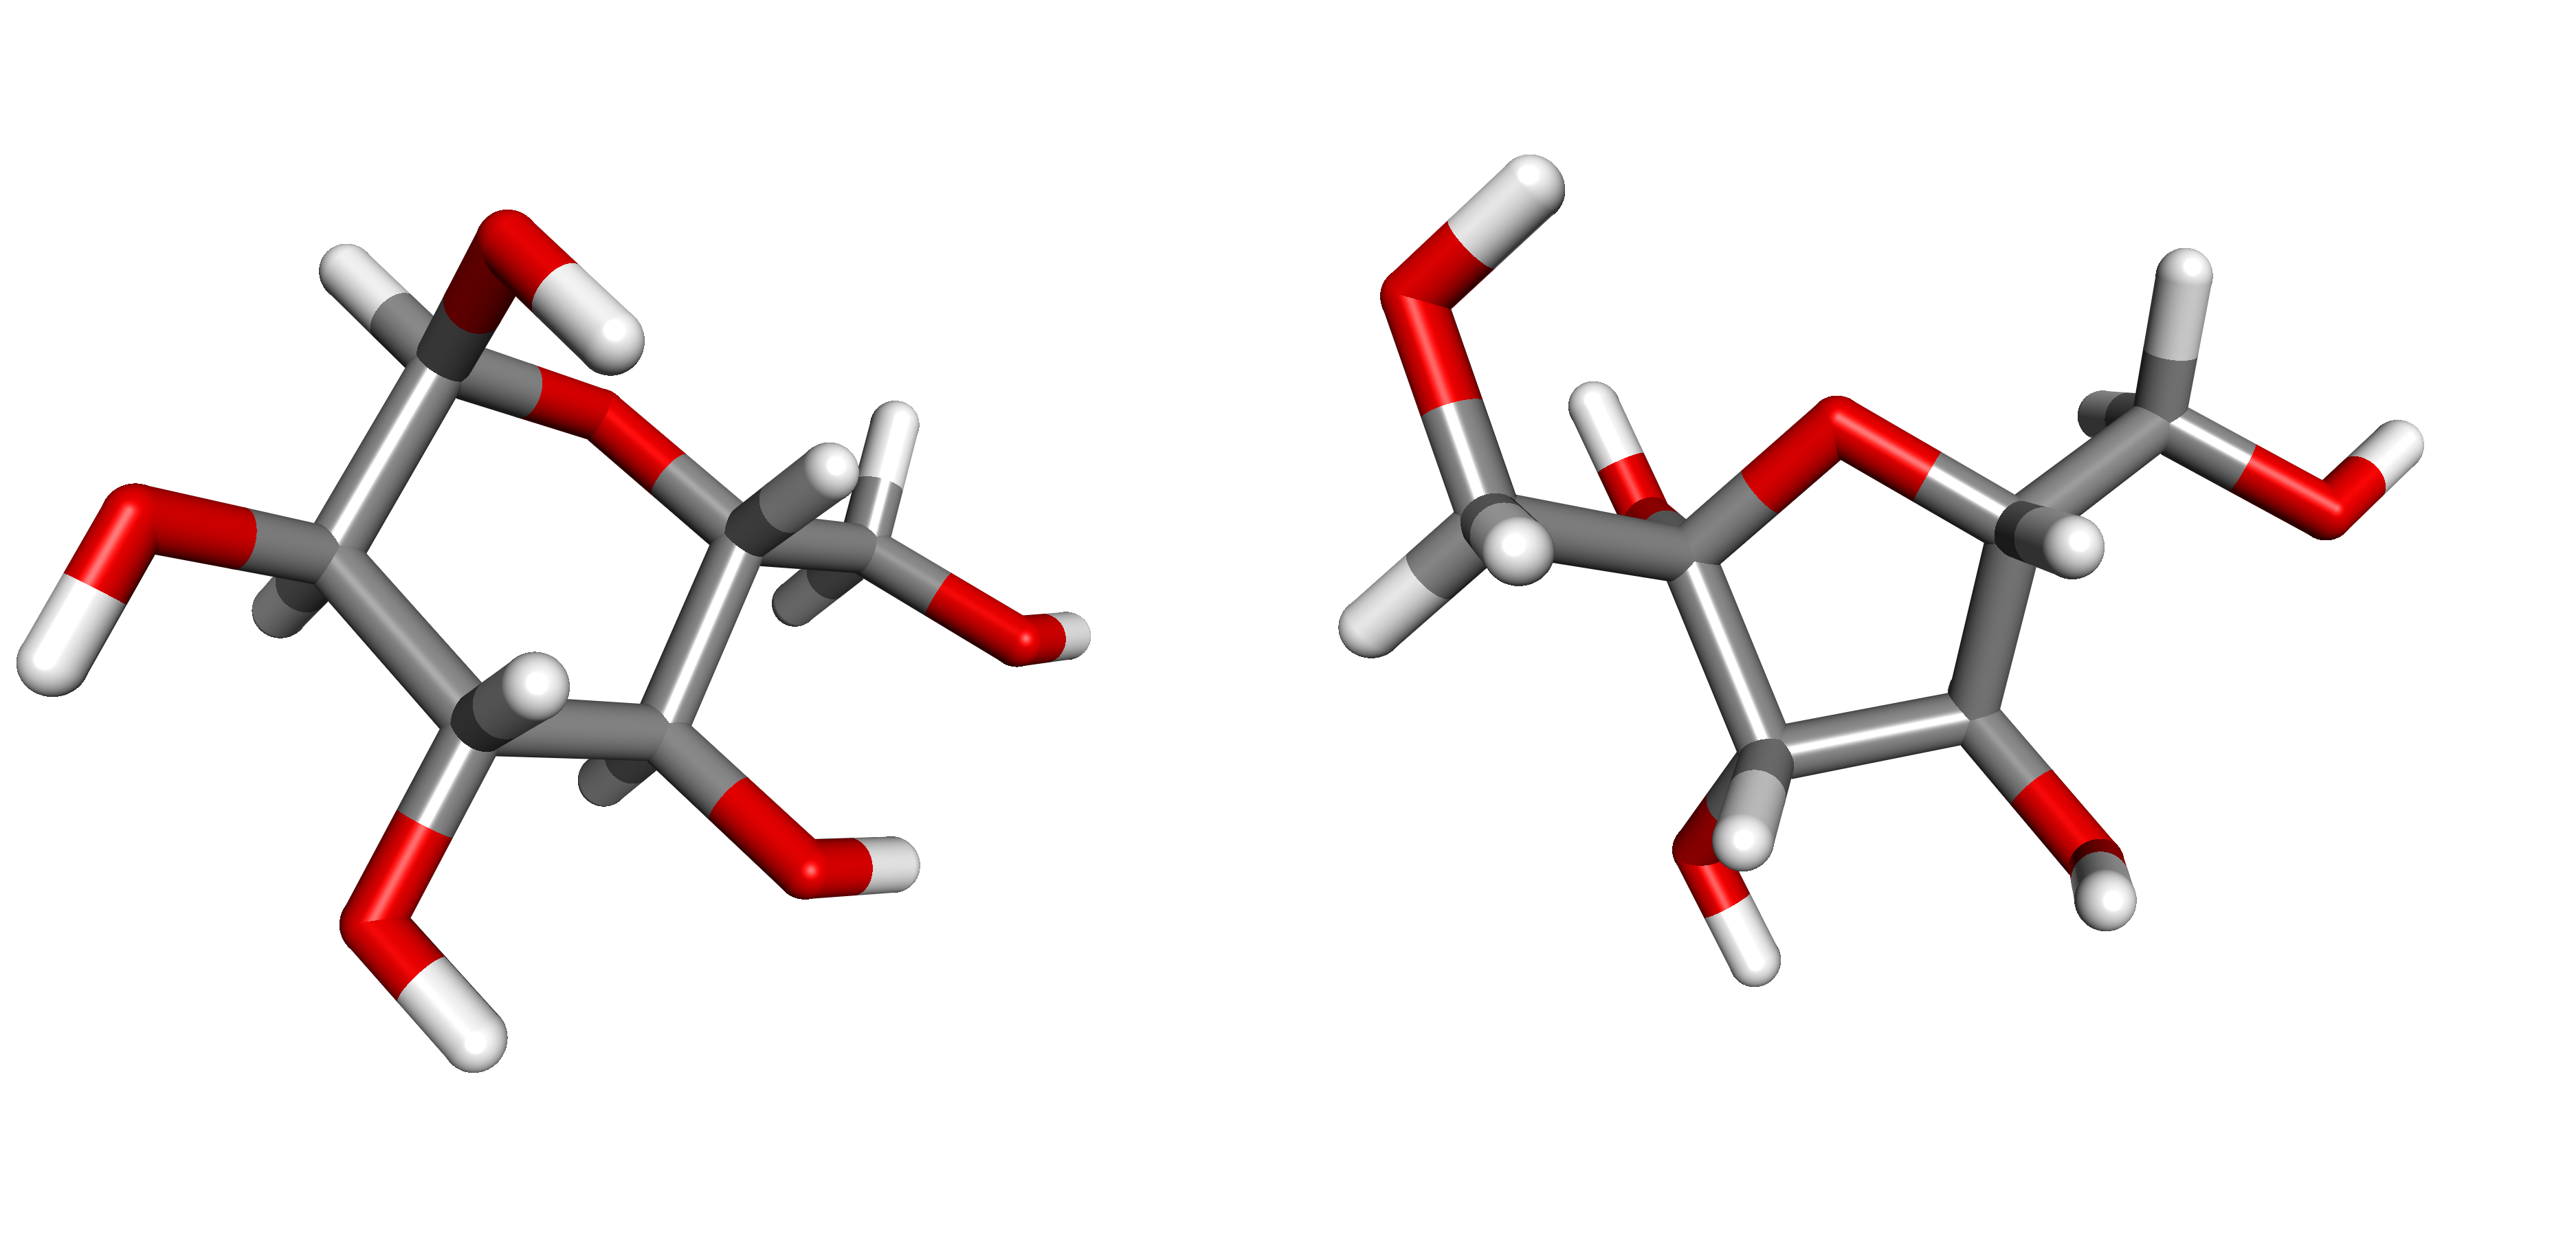

In [60]:
import requests
import os
from IPython.display import Image

# Define PDB ID and paths
pdb_id = "5TJ3"
pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
pdb_filename = f"inputs/{pdb_id}.pdb"

# Create inputs directory if it doesn't exist
if not os.path.exists("inputs"):
    os.makedirs("inputs")

# Download the PDB file from the RCSB PDB
response = requests.get(pdb_url)
if response.status_code == 200:
    with open(pdb_filename, 'wb') as file:
        file.write(response.content)
    print(f"Successfully downloaded {pdb_id}.pdb")
else:
    print(f"Failed to download {pdb_id}.pdb")
    raise Exception("Failed to download PDB file")

# Display an image
display(Image('./pyr.png', width=500))


In PyRosetta, a "pose" is a fundamental data structure that represents a protein or other macromolecular structure. It contains all the information about the 3D coordinates of atoms, the sequence of residues, and other structural details necessary for modeling and computational experiments. Here are some key points about a pose in PyRosetta:

Key Features of a Pose in PyRosetta:
Atomic Coordinates: A pose includes the 3D coordinates of all the atoms in the protein or molecular structure.
Sequence Information: It holds the sequence of residues (amino acids) that make up the protein.
Conformations: The pose can represent different conformations of the protein, including backbone and side-chain torsion angles.
Energy Scores: It includes scoring information that quantifies the stability or other properties of the structure based on Rosetta's energy functions.
Manipulation: You can manipulate the pose by performing operations such as adding or removing residues, changing torsion angles, or mutating amino acids.
Output: The pose can be used to output structures in various formats, such as PDB files, for visualization or further analysis.

Example Usage:
Here’s a simple example of how to work with a pose in PyRosetta:

In [66]:
seq = pose.sequence()

In [67]:
print(seq)

DILLAQSPVGLSVSLGERVKFSCRASQSIGTNIHWYQQRTNGSPRLLIKYASESISGIPSRFSGSGSGTDFTLSINSVESEDIADYYCQQNNNWPTTFGAGTKLELKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGAQVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSINKDNSKSQVFFKMNSLQSNDTAIYYCARALTYYDYEFAYWGQGTLVTVSAASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPKSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPRLLIKYASESISGIPSRFSGSGSGTDFTLSINSVESEDIADYYCQQNNNWPTTFGAGTKLELKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGAQVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSINKDNSKSQVFFKMNSLQSNDTAIYYCARALTYYDYEFAYWGQGTLVTVSAASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPKS


In [68]:
len(seq)

868

In [69]:
total = pose.total_residue()

In [70]:
print(total)

868


In [71]:
residue = pose.residue(503).name()

In [72]:
print(residue)

THR


To use the provided PyRosetta functions and additional functionalities to gather more information about your protein, you can create a comprehensive script. This script will extract details such as the total number of residues, the name of a specific residue, and the chain information. You can also include additional details like secondary structure elements, the sequence of a specific chain, and more.

In [ ]:
import pyrosetta
from Bio.PDB import PDBList

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "1YY8"

try:
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
except Exception as e:
    print(f"Error fetching PDB file: {e}")
    pdb_file = None

if pdb_file:
    # Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

    # Create a pose from the downloaded PDB file
    pose = pyrosetta.pose_from_file(pdb_file)

    # Basic information
    total_residues = pose.total_residue()
    print(f"Total residues: {total_residues}")

    # Example: specific residue and chain information
    residue_index = 503  # Adjust index as needed
    chain_index = 506  # Adjust index as needed

    if residue_index <= total_residues and chain_index <= total_residues:
        residue_name = pose.residue(residue_index).name()
        chain_id = pose.pdb_info().chain(chain_index)
        print(f"Residue {residue_index} name: {residue_name}")
        print(f"Chain ID of residue {chain_index}: {chain_id}")
    else:
        print("Residue index or chain index out of range")

    # Additional information
    sequence = pose.sequence()
    print(f"Sequence: {sequence}")

    # Secondary structure information
    sec_structure = pose.secstruct()
    print(f"Secondary structure: {sec_structure}")

    # Collect unique chain identifiers
    pdb_info = pose.pdb_info()
    chain_ids = set()
    for i in range(1, total_residues + 1):
        chain_ids.add(pdb_info.chain(i))
    
    # Print sequences for each chain
    for chain_id in chain_ids:
        chain_sequence = ''
        for i in range(1, total_residues + 1):
            if pdb_info.chain(i) == chain_id:
                chain_sequence += pose.residue(i).name1()
        print(f"Chain {chain_id} sequence: {chain_sequence}")

    # Displaying residues and their properties
    for i in range(1, total_residues + 1):
        residue = pose.residue(i)
        print(f"Residue {i}: {residue.name()} in chain {pdb_info.chain(i)}")

    # Print PDB information for each residue
    for i in range(1, total_residues + 1):
        print(f"Residue {i}: Chain {pdb_info.chain(i)}, PDB ResNum {pdb_info.number(i)}, Residue Name {pose.residue(i).name()}")
else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")



In [78]:
num = pose.pdb_info().number(756)
residue = pose.residue(756).name()

In [79]:
print(num)
print(residue)

109
TRP


The pdb2pose method in PyRosetta is used to convert PDB numbering (which includes chain identifiers and residue numbers) to the internal Pose numbering used by PyRosetta. This is particularly useful when you need to reference specific residues based on their PDB information rather than their internal Pose index.

In [81]:
import pyrosetta
from Bio.PDB import PDBList

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "1YY8"

try:
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
except Exception as e:
    print(f"Error fetching PDB file: {e}")
    pdb_file = None

if pdb_file:
    # Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

    # Create a pose from the downloaded PDB file
    pose = pyrosetta.pose_from_file(pdb_file)

    # Example: specific PDB residue and chain information
    pdb_chain = 'C'  # The chain identifier in the PDB file
    pdb_resnum = 66  # The residue number in the PDB file

    # Convert PDB numbering to Pose numbering
    pose_resnum = pose.pdb_info().pdb2pose(pdb_chain, pdb_resnum)
    print(pose_resnum)

    if pose_resnum > 0:
        # Now you can use pose_resnum to reference the residue in the Pose
        residue_name = pose.residue(pose_resnum).name()
        print(f"Residue {pdb_resnum} in chain {pdb_chain} is {residue_name} in Pose numbering: {pose_resnum}")

        # Example operation: mutate this residue
        pyrosetta.toolbox.mutants.mutate_residue(pose, pose_resnum, 'A')

        # Output the modified pose to a new PDB file
        pose.dump_pdb("mutated_example.pdb")
        print("Mutations applied and saved to 'mutated_example.pdb'")

    else:
        print(f"Residue {pdb_resnum} in chain {pdb_chain} not found in the Pose.")
else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

The get_secstruct(pose) function in PyRosetta is used to retrieve the secondary structure information of a protein pose. This information can be very useful in various practical scenarios, such as analyzing protein stability, studying structural motifs, and guiding protein engineering or design tasks.

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

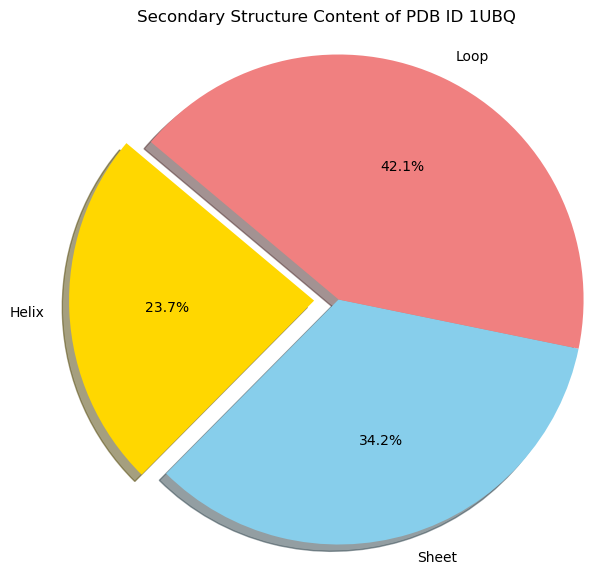

In [86]:
import pyrosetta
from pyrosetta.rosetta.core.scoring.dssp import Dssp
from Bio.PDB import PDBList
import matplotlib.pyplot as plt

# Initialize PyRosetta
pyrosetta.init()

# Function to analyze secondary structure content
def analyze_secondary_structure(secstruct):
    helix_count = secstruct.count('H')
    sheet_count = secstruct.count('E')
    loop_count = secstruct.count('L')
    total_residues = len(secstruct)
    
    helix_percent = (helix_count / total_residues) * 100
    sheet_percent = (sheet_count / total_residues) * 100
    loop_percent = (loop_count / total_residues) * 100
    
    return helix_percent, sheet_percent, loop_percent

# Fetch the PDB file using Biopython
pdb_id = "1UBQ"

try:
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
except Exception as e:
    print(f"Error fetching PDB file: {e}")
    pdb_file = None

if pdb_file:
    # Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

    # Create a pose from the downloaded PDB file
    pose = pyrosetta.pose_from_file(pdb_file)

    # Run DSSP to assign secondary structures
    dssp = Dssp(pose)
    dssp.insert_ss_into_pose(pose)

    # Get the secondary structure
    secstruct = pose.secstruct()
    print(f"Secondary Structure: {secstruct}")

    # Analyze secondary structure content
    helix_percent, sheet_percent, loop_percent = analyze_secondary_structure(secstruct)
    print(f"Helix: {helix_percent:.2f}%")
    print(f"Sheet: {sheet_percent:.2f}%")
    print(f"Loop: {loop_percent:.2f}%")

    # Plotting the secondary structure content
    labels = ['Helix', 'Sheet', 'Loop']
    sizes = [helix_percent, sheet_percent, loop_percent]
    colors = ['gold', 'skyblue', 'lightcoral']
    explode = (0.1, 0, 0)  # explode the 1st slice (Helix)

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Secondary Structure Content of PDB ID {pdb_id}')
    plt.show()
else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")





TIn the context of protein structure, the terms phi (ϕ), psi (ψ), and omega (ω) refer to the torsion angles of the protein backbone. These angles are crucial for understanding the protein's 3D conformation. Let's dive into what these angles represent and provide an example of how they can be visualized.

Understanding Phi, Psi, and Omega Angles
Phi (ϕ) Angle:

The torsion angle around the N-Cα bond in the protein backbone.
Determines the rotation of the amino acid's nitrogen atom relative to the alpha carbon (Cα).
Psi (ψ) Angle:

The torsion angle around the Cα-C bond in the protein backbone.
Determines the rotation of the carbonyl carbon atom relative to the alpha carbon (Cα).
Omega (ω) Angle:

The torsion angle around the peptide bond (C-N).
Typically, this angle is around 180 degrees (trans conformation) due to the partial double-bond character of the peptide bond, but it can also be around 0 degrees (cis conformation) in certain cases.

Practical Example: Analyzing and Visualizing Phi Angles
Let's consider a practical example where you want to analyze the phi angles of a protein structure and visualize the distribution of these angles. You can plot the phi angles for all residues in the protein to understand the conformational preferences of different regions.

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

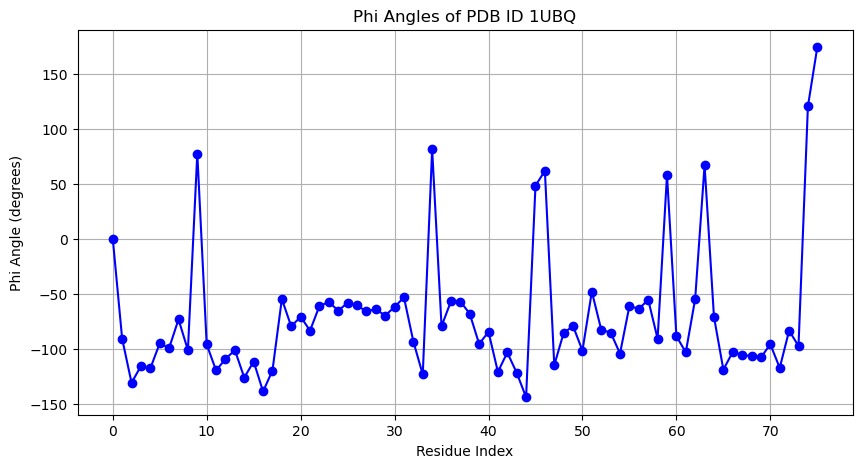

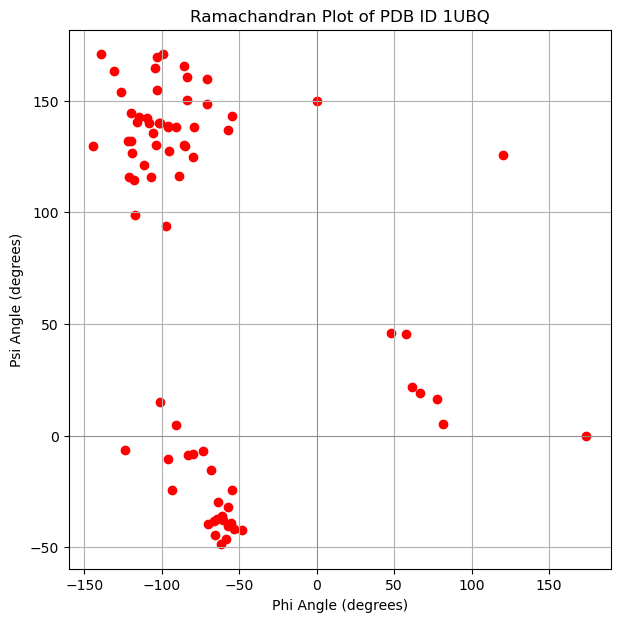

In [88]:
import pyrosetta
from Bio.PDB import PDBList
import matplotlib.pyplot as plt

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "1UBQ"

try:
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
except Exception as e:
    print(f"Error fetching PDB file: {e}")
    pdb_file = None

if pdb_file:
    # Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

    # Create a pose from the downloaded PDB file
    pose = pyrosetta.pose_from_file(pdb_file)

    # Run DSSP to assign secondary structures
    from pyrosetta.rosetta.core.scoring.dssp import Dssp
    dssp = Dssp(pose)
    dssp.insert_ss_into_pose(pose)

    # Get phi angles for all residues
    phi_angles = []
    for i in range(1, pose.total_residue() + 1):
        phi_angles.append(pose.phi(i))

    # Plotting the phi angles
    plt.figure(figsize=(10, 5))
    plt.plot(phi_angles, marker='o', linestyle='-', color='b')
    plt.title(f'Phi Angles of PDB ID {pdb_id}')
    plt.xlabel('Residue Index')
    plt.ylabel('Phi Angle (degrees)')
    plt.grid(True)
    plt.show()

    # Additional visualization: Ramachandran plot
    psi_angles = [pose.psi(i) for i in range(1, pose.total_residue() + 1)]

    plt.figure(figsize=(7, 7))
    plt.scatter(phi_angles, psi_angles, c='r', marker='o')
    plt.title(f'Ramachandran Plot of PDB ID {pdb_id}')
    plt.xlabel('Phi Angle (degrees)')
    plt.ylabel('Psi Angle (degrees)')
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.show()

else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")



In [91]:
import pymol
from pymol import cmd

# Initialize PyMOL
pymol.finish_launching()

# Load a protein structure (ubiquitin in this case)
cmd.delete("all")  # Clear any existing objects to avoid conflicts
cmd.fetch("1ubq", "ubiquitin")  # Specify an object name to avoid conflicts

# Select a specific residue to analyze (residue 10 in this case)
residue = "10"
chain = "A"

# Function to calculate phi, psi, and omega angles
def calculate_phi_psi_omega(residue, chain):
    # Phi angle: between C(N-1), N, CA, and C
    phi_angle = cmd.get_dihedral(f"ubiquitin and name C and resi {int(residue)-1}",
                                 f"ubiquitin and name N and resi {residue}",
                                 f"ubiquitin and name CA and resi {residue}",
                                 f"ubiquitin and name C and resi {residue}")
    
    # Psi angle: between N, CA, C, and N(N+1)
    psi_angle = cmd.get_dihedral(f"ubiquitin and name N and resi {residue}",
                                 f"ubiquitin and name CA and resi {residue}",
                                 f"ubiquitin and name C and resi {residue}",
                                 f"ubiquitin and name N and resi {int(residue)+1}")
    
    # Omega angle: between CA(N-1), C(N-1), N, and CA
    omega_angle = cmd.get_dihedral(f"ubiquitin and name CA and resi {int(residue)-1}",
                                   f"ubiquitin and name C and resi {int(residue)-1}",
                                   f"ubiquitin and name N and resi {residue}",
                                   f"ubiquitin and name CA and resi {residue}")
    
    return phi_angle, psi_angle, omega_angle

# Calculate and print the angles
phi, psi, omega = calculate_phi_psi_omega(residue, chain)
print(f"Phi angle for residue {residue}: {phi} degrees")
print(f"Psi angle for residue {residue}: {psi} degrees")
print(f"Omega angle for residue {residue}: {omega} degrees")

# Visualize the angles
cmd.show("sticks", f"ubiquitin and resi {residue}")
cmd.color("green", f"ubiquitin and resi {residue}")

# Highlight the torsion angles for better visualization
cmd.set("label_size", -0.4)
cmd.label(f"ubiquitin and name N and resi {residue}", f"'{phi:.1f}'")
cmd.label(f"ubiquitin and name CA and resi {residue}", f"'{psi:.1f}'")
cmd.label(f"ubiquitin and name C and resi {residue}", f"'{omega:.1f}'")

# Zoom in on the residue
cmd.zoom(f"ubiquitin and resi {residue}")

# Keep PyMOL window open
cmd.set("internal_gui", 1)
cmd.set("internal_feedback", 1)
cmd.do("zoom")




Phi angle for residue 10: 77.44471740722656 degrees
Psi angle for residue 10: 16.544416427612305 degrees
Omega angle for residue 10: 179.79632568359375 degrees
PyMOL>zoom


The pose.phi(residue_index) function in PyRosetta is used to retrieve the phi torsion angle of a specific residue, while pose.set_phi(residue_index, angle) is used to set the phi torsion angle to a specified value. These functions are useful in structural biology and protein engineering when you need to analyze or manipulate the backbone conformation of a protein.

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

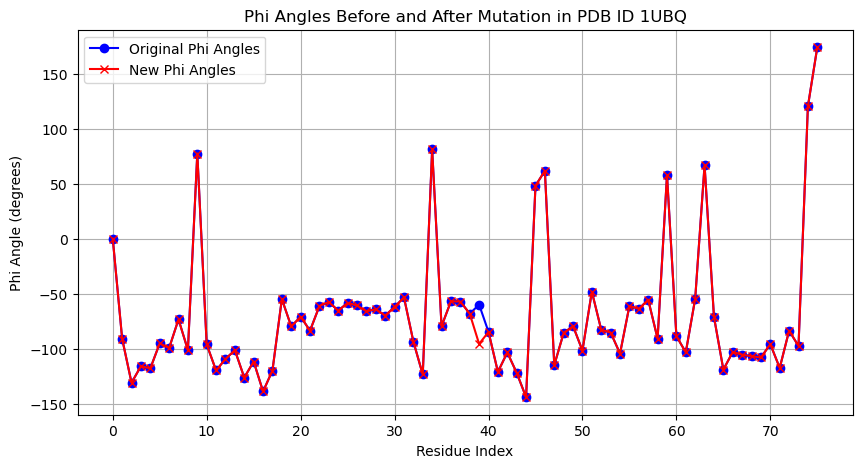

In [92]:
import pyrosetta
from Bio.PDB import PDBList
import matplotlib.pyplot as plt

# Initialize PyRosetta
pyrosetta.init()

# Function to fetch a PDB file using Biopython
def fetch_pdb(pdb_id):
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
    return pdb_file

# Fetch the PDB file
pdb_id = "1UBQ"
pdb_file = fetch_pdb(pdb_id)
if pdb_file:
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")
    pose = pyrosetta.pose_from_file(pdb_file)

    # Run DSSP to assign secondary structures
    from pyrosetta.rosetta.core.scoring.dssp import Dssp
    dssp = Dssp(pose)
    dssp.insert_ss_into_pose(pose)

    # Retrieve the phi angle of residue 40
    residue_index = 40
    original_phi = pose.phi(residue_index)
    print(f"Original phi angle of residue {residue_index}: {original_phi:.2f} degrees")

    # Mutate residue 40 to alanine
    pyrosetta.toolbox.mutants.mutate_residue(pose, residue_index, 'A')

    # Set a new phi angle for the mutated residue
    new_phi = -60.0
    pose.set_phi(residue_index, new_phi)
    print(f"New phi angle of residue {residue_index}: {pose.phi(residue_index):.2f} degrees")

    # Get phi angles for all residues before and after mutation
    phi_angles_original = [pose.phi(i) for i in range(1, pose.total_residue() + 1)]
    pose.set_phi(residue_index, original_phi)  # Revert to original phi for comparison
    phi_angles_new = [pose.phi(i) for i in range(1, pose.total_residue() + 1)]
    pose.set_phi(residue_index, new_phi)  # Set the new phi angle again

    # Plotting the phi angles before and after mutation
    plt.figure(figsize=(10, 5))
    plt.plot(phi_angles_original, label='Original Phi Angles', marker='o', linestyle='-', color='b')
    plt.plot(phi_angles_new, label='New Phi Angles', marker='x', linestyle='-', color='r')
    plt.title(f'Phi Angles Before and After Mutation in PDB ID {pdb_id}')
    plt.xlabel('Residue Index')
    plt.ylabel('Phi Angle (degrees)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")


Using get_fa_scorefxn() in PyRosetta is essential for obtaining a full-atom scoring function, which evaluates the energy of a protein structure. The scoring function is a critical component in protein modeling tasks, such as structure prediction, design, and refinement. Visualizing the scores can help you understand the energy landscape of the protein and identify regions with high energy that might be problematic.

This practical example demonstrates how to use get_fa_scorefxn() to evaluate the energy of a protein structure and visualize per-residue energy contributions. By plotting the energy contributions, you can identify regions with high energy that might be problematic or require further investigation. This information is valuable for understanding protein stability and guiding protein design or refinement efforts.

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

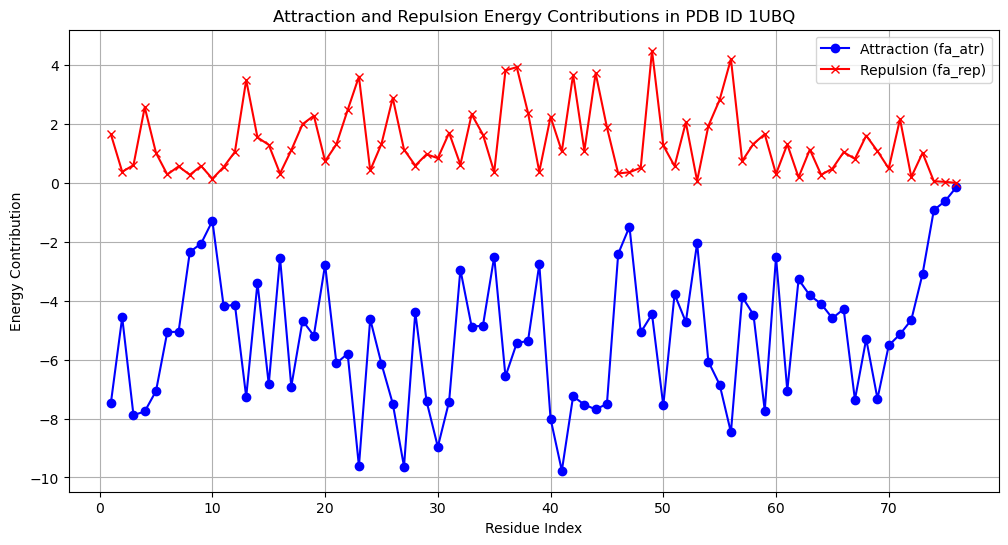

In [95]:
import pyrosetta
from Bio.PDB import PDBList
import matplotlib.pyplot as plt
import os

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
def fetch_pdb(pdb_id):
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
    return pdb_file

# Fetch the PDB file
pdb_id = "1UBQ"
pdb_file = fetch_pdb(pdb_id)
if pdb_file:
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")
    pose = pyrosetta.pose_from_file(pdb_file)

    # Get the full-atom scoring function
    scorefxn = pyrosetta.get_fa_scorefxn()

    # Evaluate the energy of the entire pose
    total_score = scorefxn(pose)
    print(f"Total score of the pose: {total_score:.2f}")

    # Evaluate the per-residue attraction and repulsion energy contributions
    attraction_energies = []
    repulsion_energies = []
    for i in range(1, pose.total_residue() + 1):
        res_energies = pose.energies().residue_total_energies(i)
        attraction_energy = res_energies[pyrosetta.rosetta.core.scoring.fa_atr]
        repulsion_energy = res_energies[pyrosetta.rosetta.core.scoring.fa_rep]
        attraction_energies.append(attraction_energy)
        repulsion_energies.append(repulsion_energy)

    # Plotting the attraction and repulsion energy contributions
    residues = range(1, pose.total_residue() + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(residues, attraction_energies, label='Attraction (fa_atr)', marker='o', linestyle='-', color='blue')
    plt.plot(residues, repulsion_energies, label='Repulsion (fa_rep)', marker='x', linestyle='-', color='red')
    plt.title(f'Attraction and Repulsion Energy Contributions in PDB ID {pdb_id}')
    plt.xlabel('Residue Index')
    plt.ylabel('Energy Contribution')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")




This script provides a comprehensive breakdown of the scoring function for a protein pose, captures the detailed scoring information, and visualizes it in a table and a plot. By analyzing the attraction and repulsion energy terms, you can gain insights into the stability and interactions within the protein, guiding further refinement or design efforts.

In [100]:
import pyrosetta
from Bio.PDB import PDBList
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from io import StringIO

# Initialize PyRosetta
pyrosetta.init()

# Function to fetch a PDB file using Biopython
def fetch_pdb(pdb_id):
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
    return pdb_file

# Capture function output
class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        sys.stdout = self._stdout

# Fetch the PDB file
pdb_id = "1UBQ"
pdb_file = fetch_pdb(pdb_id)
if pdb_file:
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")
    pose = pyrosetta.pose_from_file(pdb_file)

    # Get the full-atom scoring function
    scorefxn = pyrosetta.get_fa_scorefxn()

    # Evaluate the energy of the entire pose
    total_score = scorefxn(pose)
    print(f"Total score of the pose: {total_score:.2f}")

    # Show detailed breakdown of scoring and capture the output
    with Capturing() as score_details:
        scorefxn.show(pose)

    # Print the captured scoring details
    for line in score_details:
        print(line)

    # Parse the score details into a DataFrame
    # Find the start of the per-residue scores
    residue_start_idx = None
    for idx, line in enumerate(score_details):
        if line.strip().startswith("pose"):
            residue_start_idx = idx + 1
            break

    if residue_start_idx is not None:
        lines = score_details[residue_start_idx:]  # Skip the header and separator
        scores_data = []
        columns = ['residue'] + lines[0].split()[1:]

        for line in lines[2:]:  # Skip the first line of actual data (header)
            if line.strip().startswith('pose'):
                break
            scores_data.append(line.split())

        df_scores = pd.DataFrame(scores_data, columns=columns)
        df_scores = df_scores.apply(pd.to_numeric, errors='ignore')

        # Display the DataFrame as a table
        print(df_scores)

        # Plotting the attraction and repulsion energy contributions
        attraction_energies = df_scores['fa_atr']
        repulsion_energies = df_scores['fa_rep']
        residues = df_scores['residue']

        plt.figure(figsize=(12, 6))
        plt.plot(residues, attraction_energies, label='Attraction (fa_atr)', marker='o', linestyle='-', color='blue')
        plt.plot(residues, repulsion_energies, label='Repulsion (fa_rep)', marker='x', linestyle='-', color='red')
        plt.title(f'Attraction and Repulsion Energy Contributions in PDB ID {pdb_id}')
        plt.xlabel('Residue Index')
        plt.ylabel('Energy Contribution')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Failed to parse the per-residue scores from the captured details.")
else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")





┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

In [103]:
import pyrosetta
import os
from Bio.PDB import PDBList
from IPython.display import Image, display
import subprocess

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "1YY8"
pdbl = PDBList()
pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")

# Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

# Create a pose from the downloaded PDB file
pose = pyrosetta.pose_from_file(pdb_file)

# Print sequence and total score before mutation and relaxation
print("Initial pose:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Manipulate the pose: add a residue, mutate a residue, etc.
# Example: mutate residue 5 to alanine
mutations = [(5, 'A'), (10, 'G'), (15, 'L'), (20, 'K')]

for res_num, new_res in mutations:
    pyrosetta.toolbox.mutants.mutate_residue(pose, res_num, new_res)

# Output the modified pose to a new PDB file
pose.dump_pdb("mutated_example.pdb")

# Print sequence and total score after mutation
print("Pose after mutation:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Get the full-atom scoring function
scorefxn = pyrosetta.get_fa_scorefxn()

# Create and configure the FastRelax protocol
relax = pyrosetta.rosetta.protocols.relax.FastRelax()
relax.set_scorefxn(scorefxn)

# Apply the FastRelax protocol to the pose
relax.apply(pose)

# Output the relaxed pose to a new PDB file
pose.dump_pdb("relaxed_example.pdb")

# Print sequence and total score after relaxation
print("Pose after relaxation:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Optionally, visualize the structure using PyMOL or another visualization tool
# Example: using PyMOL to visualize the relaxed structure
with subprocess.Popen(['pymol', '-cq'], stdin=subprocess.PIPE) as proc:
    pymol_script = f"""
    load relaxed_example.pdb
    png relaxed_example.png
    quit
    """
    proc.communicate(pymol_script.encode())

# Display the generated image
if os.path.exists("relaxed_example.png"):
    display(Image(filename="relaxed_example.png"))


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

This script demonstrates how to:

Initialize PyRosetta: Setting up the environment for protein structure manipulation.
Fetch a Protein Structure: Download a PDB file using Biopython.
Load the Structure into PyRosetta: Create a pose object from the downloaded PDB file.
Analyze the Structure: Print the sequence and energy score of the structure.
Modify the Structure: Apply a series of mutations to specific residues.
Save the Modified Structure: Output the modified structure to a new PDB file.
The script provides a workflow for downloading, analyzing, modifying, and saving protein structures using PyRosetta and Biopython, which can be useful in protein engineering, design, and structural biology studies.

In [64]:
import pyrosetta
import os
from Bio.PDB import PDBList
from IPython.display import Image, display
import subprocess

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "1YY8"
pdbl = PDBList()
pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")

# Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

# Create a pose from the downloaded PDB file
pose = pyrosetta.pose_from_file(pdb_file)

# Print sequence and total score
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Manipulate the pose: add a residue, mutate a residue, etc.
# Example: mutate residue 5 to alanine
mutations = [(5, 'A'), (10, 'G'), (15, 'L'), (20, 'K')]

for res_num, new_res in mutations:
    pyrosetta.toolbox.mutants.mutate_residue(pose, res_num, new_res)

# Output the modified pose to a new PDB file
pose.dump_pdb("mutated_example.pdb")





┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

True

In [107]:
import pyrosetta
import os
from Bio.PDB import PDBList
from IPython.display import Image, display
import subprocess

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "3NIR"
pdbl = PDBList()
pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")

# Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

# Create a pose from the downloaded PDB file
pose = pyrosetta.pose_from_file(pdb_file)

# Print sequence and total score before mutation and relaxation
print("Initial pose:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Manipulate the pose: add a residue, mutate a residue, etc.
# Example: mutate residue 5 to alanine
mutations = [(5, 'A'), (10, 'G'), (15, 'L'), (20, 'K')]

for res_num, new_res in mutations:
    pyrosetta.toolbox.mutants.mutate_residue(pose, res_num, new_res)

# Output the modified pose to a new PDB file
pose.dump_pdb("mutated_example.pdb")

# Print sequence and total score after mutation
print("Pose after mutation:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Get the full-atom scoring function
scorefxn = pyrosetta.get_fa_scorefxn()

# Create and configure the FastRelax protocol
#relax = pyrosetta.rosetta.protocols.relax.FastRelax()
#relax.set_scorefxn(scorefxn)

# Apply the FastRelax protocol to the pose
#relax.apply(pose)

# Output the relaxed pose to a new PDB file
#pose.dump_pdb("relaxed_example.pdb")

# Print sequence and total score after relaxation
print("Pose after relaxation:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Create a standard packer task
from pyrosetta.rosetta.core.pack.task import TaskFactory
from pyrosetta.rosetta.core.pack.task.operation import RestrictToRepacking

task_factory = TaskFactory()
task_factory.push_back(RestrictToRepacking())
packer_task = task_factory.create_task_and_apply_taskoperations(pose)

# Create and apply the PackRotamersMover
pack_mover = pyrosetta.rosetta.protocols.minimization_packing.PackRotamersMover(scorefxn, packer_task)
pack_mover.apply(pose)

# Output the packed pose to a new PDB file
pose.dump_pdb("packed_example.pdb")

# Print sequence and total score after packing
print("Pose after packing:")
print(pose)
print("Sequence:", pose.sequence())
print("Total Score:", pose.energies().total_energy())

# Optionally, visualize the structure using PyMOL or another visualization tool
# Example: using PyMOL to visualize the packed structure
with subprocess.Popen(['pymol', '-cq'], stdin=subprocess.PIPE) as proc:
    pymol_script = f"""
    load packed_example.pdb
    png packed_example.png
    quit
    """
    proc.communicate(pymol_script.encode())

# Display the generated image
if os.path.exists("packed_example.png"):
    display(Image(filename="packed_example.png"))

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

To apply BLAST (Basic Local Alignment Search Tool) to the sequence obtained from the PyRosetta pose, you can use the Biopython library to interact with the NCBI BLAST service. Below is a step-by-step guide on how to extract the sequence from the PyRosetta pose, run a BLAST search, and handle the results.

Step-by-Step Guide
Extract the sequence from the PyRosetta pose.
Use Biopython to perform a BLAST search against the NCBI database.
Process and display the BLAST results.

In [ ]:
import pyrosetta
from Bio.PDB import PDBList
from Bio.Blast import NCBIWWW, NCBIXML

# Initialize PyRosetta
pyrosetta.init()

# Fetch the PDB file using Biopython
pdb_id = "1YY8"

try:
    pdbl = PDBList()
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir=".")
except Exception as e:
    print(f"Error fetching PDB file: {e}")
    pdb_file = None

if pdb_file:
    # Correct the file path if necessary (PDBList saves with 'pdb' prefix by default)
    pdb_file = os.path.join(".", f"pdb{pdb_id.lower()}.ent")

    # Create a pose from the downloaded PDB file
    pose = pyrosetta.pose_from_file(pdb_file)

    # Print sequence and total score
    sequence = pose.sequence()
    print("Sequence:", sequence)
    print("Total Score:", pose.energies().total_energy())

    # Mutate multiple residues
    mutations = [(5, 'A'), (10, 'G'), (15, 'L'), (20, 'K')]
    for res_num, new_res in mutations:
        pyrosetta.toolbox.mutants.mutate_residue(pose, res_num, new_res)

    # Output the modified pose to a new PDB file
    pose.dump_pdb("mutated_example.pdb")

    print("Mutations applied and saved to 'mutated_example.pdb'")

    # Perform a BLAST search
    print("Performing BLAST search...")
    result_handle = NCBIWWW.qblast("blastp", "nr", sequence)

    # Save the BLAST result
    with open("blast_result.xml", "w") as save_to:
        save_to.write(result_handle.read())
    result_handle.close()

    # Parse the BLAST result
    with open("blast_result.xml") as result_handle:
        blast_record = NCBIXML.read(result_handle)

    # Print BLAST results
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < 0.01:  # Threshold for reporting
                print(f"****Alignment****")
                print(f"sequence: {alignment.title}")
                print(f"length: {alignment.length}")
                print(f"e value: {hsp.expect}")
                print(hsp.query[0:75] + "...")
                print(hsp.match[0:75] + "...")
                print(hsp.sbjct[0:75] + "...")
else:
    print("Failed to fetch the PDB file. Please check the PDB ID and your internet connection.")



The modified_example.pdb file, which contains your modified protein structure, can be used in a variety of ways depending on your research and application needs. Here are some common use cases:

* **Visualization**
You can visualize the modified protein structure using molecular visualization tools such as PyMol



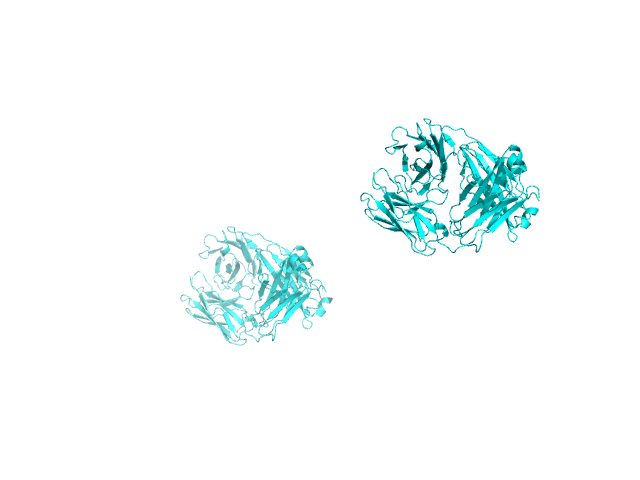

In [62]:
import pymol2
from IPython.display import Image, display

# Initialize PyMOL
with pymol2.PyMOL() as pymol:
    # Load the PDB file
    pymol.cmd.load("modified_example.pdb")
    
    # Set up the visualization
    pymol.cmd.show("cartoon")
    pymol.cmd.color("cyan", "all")
    pymol.cmd.set("ray_opaque_background", 0)
    
    # Apply some transformations
    pymol.cmd.zoom()
    pymol.cmd.move("x", 10)  # Pan in the x direction
    pymol.cmd.turn("y", 45)  # Rotate around the y-axis
    
    # Render the image
    pymol.cmd.png("structure.png")

# Display the image
display(Image("structure.png"))

**Protein Design and Mutagenesis**
Computational Mutagenesis:
* Rosetta: Design new protein sequences or predict the effects of mutations.

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

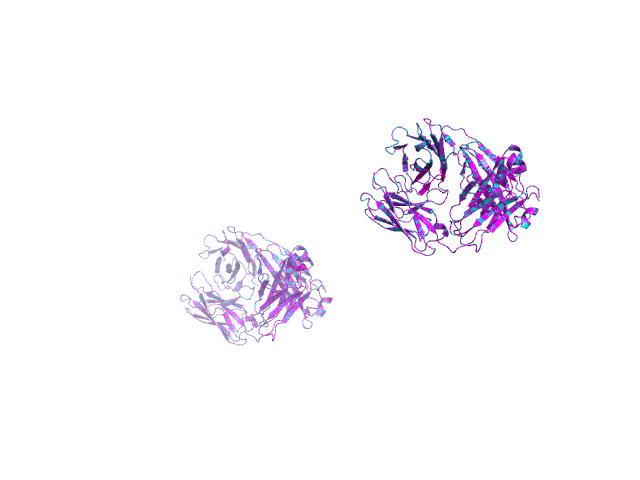

In [63]:
import pyrosetta
import pymol2
from IPython.display import Image, display

# Initialize PyRosetta
pyrosetta.init()

# Load the original PDB file
pose = pyrosetta.pose_from_file("modified_example.pdb")

# Define the mutations: a list of tuples (residue_number, new_amino_acid)
mutations = [(5, 'A'), (10, 'G'), (15, 'L'), (20, 'K')]

# Apply the mutations
for res_num, new_res in mutations:
    pyrosetta.toolbox.mutants.mutate_residue(pose, res_num, new_res)

# Save the mutated structure to a new PDB file
pose.dump_pdb("mutated_example.pdb")

# Initialize PyMOL
with pymol2.PyMOL() as pymol:
    # Load the original PDB file
    pymol.cmd.load("modified_example.pdb", "original")
    pymol.cmd.color("cyan", "original")
    
    # Load the mutated PDB file
    pymol.cmd.load("mutated_example.pdb", "mutated")
    pymol.cmd.color("magenta", "mutated")
    
    # Set up the visualization
    pymol.cmd.show("cartoon", "original")
    pymol.cmd.show("cartoon", "mutated")
    
    # Superimpose the mutated structure onto the original structure
    pymol.cmd.align("mutated", "original")
    
    # Apply some transformations
    pymol.cmd.zoom()
    pymol.cmd.move("x", 10)  # Pan in the x direction
    pymol.cmd.turn("y", 45)  # Rotate around the y-axis
    
    # Render the image
    pymol.cmd.png("structure.png")

# Display the image
display(Image("structure.png"))






In [ ]:
['